In [74]:
import numpy as np
import matplotlib.pyplot as plt

class StringNet:
    
    
    # Initialization of the StringNet Object
    def __init__(self,N):
        self.circle = [0 for i in range(N)]
        self.leg = [[]]
        self.pipe = [[] for i in range(N)]
        self.line = [[] for i in range(N)]
        self.vbegin = [i for i in range(N)]
        self.circle_number = N
        self.stack_circle = [[],N]
        self.stack_leg = [[],1]  
        self.N = N
        
    def fn_print(self):
        print('============================================')
        print('circle:')
        print(self.circle)
        print('leg:')
        print(self.leg)
        
        print('pipe:')
        print(self.pipe)
        print('line:')
        print(self.line)
        print('vbegin:')
        print(self.vbegin)
        print('stack_circle:')
        print(self.stack_circle)
        print('stack_leg')
        print(self.stack_leg)
        print('============================================')
    
    # find the circle index at position (line,y)
    def fn_find_circle(self,line,y):
        
        # if the line is empty, fetch the circle number in "vbegin"
        if not self.line[line]:
            ind_leg_up = -1
            ind_leg_down = -1
            circle_label = self.vbegin[line]
        else:
            # fetch the y coordinate in the line-th "line"
            tv = [self.line[line][i][1] for i in range(len(self.line[line]))]
            (ind_up,ind_down) = self.fn_find_nearest(y,tv)
            if ind_up!=-1:
                # fetch the index for the nearest leg 
                ind_leg_up = self.line[line][ind_up][0]
                ind_leg_down = self.line[line][ind_down][0]
                circle_label = self.leg[ind_leg_up][3]
                
            else:
                # if failuren in the call fn_find_nearest()
                ind_leg_up = -1
                ind_leg_down = -1
                circle_label = -1
        return ind_leg_up,ind_leg_down,circle_label
    
    # find the nearest index to the value y, in the vector vy
    def fn_find_nearest(self,y,vy):
        # In fact the input "vy" is sorted by accsend order
        # the function smod() is the same to the mod(x,1) in the matlab
        ind_large = None
        for ind_large in (x for x in range(len(vy)) if vy[x]>=y): break
        if ind_large==None:
            ind_up = len(vy) - 1
            ind_down = 0
        elif vy[ind_large]==y:
            ind_up = -1
            ind_down = -1
        elif ind_large==0:
            ind_up = len(vy) - 1
            ind_down = 0
        else:
            ind_up = ind_large - 1
            ind_down = ind_large   
        # smod = lambda x: x + 1 - int(1+x)
        # tv = [smod(vy[i] - y) for i in range(0,len(vy))]
        # the method could be improved in the furture
        # ind_up = tv.index(max(tv))
        # ind_down = tv.index(min(tv))
        # if min(tv)==0:
        #     ind_up = -1
        #     ind_down = -1
        return ind_up,ind_down   
     
    # The functions 
    #    fn_stack_leg_pull()
    #    fn_stack_leg_push()
    #    fn_stack_circle_pull()
    #    fn_stack_circle_push()
    # maintain the stack for generation of the index of the legs and circles
    # respectively. 
    def fn_stack_leg_pull(self):
        if not self.stack_leg[0]:
            num_leg = self.stack_leg[1]
            self.stack_leg[1] = num_leg + 1
            self.leg.append([])
        else:
            num_leg = self.stack_leg[0][-1]
            self.stack_leg[0].pop()
        return num_leg
            
    def fn_stack_leg_push(self,index):
        self.stack_leg[0].append(index)
        
    def fn_stack_circle_pull(self):
        if not self.stack_circle[0]:
            num_circle = self.stack_circle[1]
            self.stack_circle[1] = num_circle + 1
            self.circle.append([])
        else:
            num_circle = self.stack_circle[0][-1]
            self.stack_circle[0].pop()
        return num_circle
            
    def fn_stack_circle_push(self,index):
        self.stack_circle[0].append(index)
     
    
    '''
    def fn_update_line(self,line,num_leg,y):
        if not self.line[line]:
            self.line[line] = [[num_leg,y]]
            return
        
        tv = [self.line[line][i][1] for i in range(len(self.line[line]))]
        ind_large = None
        for ind_large in (x for x in range(len(tv)) if tv[x]>y): break
        if ind_large==None:
            self.line[line].append([num_leg,y])
        else:
            self.line[line] = self.line[line][:ind_large] + [[num_leg,y]] \
            + self.line[line][ind_large:]
    '''    
    
    def fn_update_line(self,line,num_leg,y):
        ind_large = len(self.line[line])
        for ind_large in (x for x in range(len(self.line[line])) if self.line[line][x][1]>y): break
        self.line[line][ind_large:ind_large] = [[num_leg,y]]
     
    ''' 
    def fn_update_line2(self,line,num_leg):
        tv = [self.line[line][i][0] for i in range(len(self.line[line]))]
        index = tv.index(num_leg)
        self.line[line].pop(index)
    '''
    
    def fn_update_line2(self,line,num_leg):
        self.line[line] = [x for x in self.line[line] if x[0]!=num_leg]
        
     
    '''
    def fn_update_pipe(self,pipe,num_leg,y):
        if not self.pipe[pipe]:
            self.pipe[pipe] = [[num_leg,y]]
            return
        
        tv = [self.pipe[pipe][i][1] for i in range(len(self.pipe[pipe]))]
        ind_large = None
        for ind_large in (x for x in range(len(tv)) if tv[x]>y): break
        if ind_large==None:
            self.pipe[pipe].append([num_leg,y])
        else:
            self.pipe[pipe] = self.pipe[pipe][:ind_large] + [[num_leg,y]] \
            + self.pipe[pipe][ind_large:]
    '''
    
    def fn_update_pipe(self,pipe,num_leg,y):
        ind_large = len(self.pipe[pipe])
        for ind_large in (x for x in range(len(self.pipe[pipe])) if self.pipe[pipe][x][1]>y): break
        self.pipe[pipe][ind_large:ind_large] = [[num_leg,y]]
        
    
    ''''
    def fn_update_pipe2(self,pipe,num_leg):
        tv = [self.pipe[pipe][i][0] for i in range(len(self.pipe[pipe]))]
        index = tv.index(num_leg)
        self.pipe[pipe].pop(index)
    '''
    
    def fn_update_pipe2(self,pipe,num_leg):
        self.pipe[pipe] = [x for x in self.pipe[pipe] if x[0]!=num_leg]
    
    def fn_update_leg(self,circle_number):
        if self.circle[circle_number]!=0:
            for x in range(len(self.circle[circle_number])):
                if x%2==0:
                    leg_number = self.circle[circle_number][x]
                    self.leg[leg_number][2] = circle_number
                else:
                    leg_number = -self.circle[circle_number][x]
                    self.leg[leg_number][3] = circle_number
                
    '''         
    def fn_find_leg(self,ind_leg):
        pipe = self.leg[ind_leg][0]
        line1 = pipe
        line2 = (pipe+1)%self.N
        n1 = len(self.line[line1])
        n2 = len(self.line[line2])
        p1 = [self.line[line1][i][0] for i in range(n1)].index(ind_leg)
        p2 = [self.line[line2][i][0] for i in range(n2)].index(ind_leg)
        left_up = self.line[line1][(p1-1)%n1][0]
        left_down = self.line[line1][(p1+1)%n1][0]
        right_up = self.line[line2][(p2-1)%n2][0]
        right_down = self.line[line2][(p2+1)%n2][0]
        return left_up,right_up,left_down,right_down
    '''
    
    def fn_find_leg(self,ind_leg):
        pipe = self.leg[ind_leg][0]
        line1 = pipe
        # line2 = (pipe+1)%self.N
        n1 = len(self.line[line1])
        # n2 = len(self.line[line2])
        
        for p1 in (x for x in range(n1) if self.line[line1][x][0]==ind_leg): break
        # for p2 in (x for x in range(n2) if self.line[line2][x][0]==ind_leg): break
        left_up = self.line[line1][(p1-1)%n1][0]
        left_down = self.line[line1][(p1+1)%n1][0]
        # right_up = self.line[line2][(p2-1)%n2][0]
        # right_down = self.line[line2][(p2+1)%n2][0]
        return left_up,left_down 
    
        
        
    
    def fn_crmap2(self,dis):
        vx = [self.vbegin[k] if (not self.line[k]) else self.leg[self.line[k][0][0]][2] for k in range(self.N)]
        tv = [1 if vx[k]==vx[(k+dis)%self.N] else 0 for k in range(self.N)] 
        return tv
    
    '''
    def fn_crmap(self,dis):
        vx = np.zeros(self.N)
        for k in range(self.N):
            if not self.line[k]:
                vx[k] = self.vbegin[k]
            else:
                vx[k] = self.leg[self.line[k][0][0]][2]
            
            vx2 = np.append(vx[dis:],vx[:dis])
            
        return (vx==vx2).astype('int')
    '''
    
    def fn_which_circle(self):
        vx = np.zeros(self.N)
        for k in range(self.N):
            if not self.line[k]:
                vx[k] = self.vbegin[k]
            else:
                vx[k] = self.leg[self.line[k][0][0]][2]
                
        return vx
    
    def fn_sort_circle_plus(self,circle,p_plus,p_minus):
        if p_plus==0 and p_minus==len(self.circle[circle])-1:
            return
        elif p_plus+1==p_minus:
            self.circle[circle] = self.circle[circle][p_minus:] + self.circle[circle][:p_minus]
            self.circle[circle].reverse()
        elif p_plus-1==p_minus:
            self.circle[circle] = self.circle[circle][p_plus:] + self.circle[circle][:p_plus]
            
        else:
            print('error')
    
    def fn_sort_circle_minus(self,circle,p_plus,p_minus):
        if p_plus==0 and p_minus==len(self.circle[circle])-1:
            self.circle[circle].reverse()
        elif p_plus+1==p_minus:
            self.circle[circle] = self.circle[circle][p_minus:] + self.circle[circle][:p_minus]  
        elif p_plus-1==p_minus:
            self.circle[circle] = self.circle[circle][p_plus:] + self.circle[circle][:p_plus]
            self.circle[circle].reverse()                                                                       
        else:
            print('error')                                                                          
                                                                                      
        
    
    # Insert the leg
    def fn_insert_leg(self,pipe,y):
        # line1 and line2 are lines of the left-side and right-side of the pipe
        # respectively
        line1 = pipe
        line2 = (pipe+1)%self.N
        (leg_up_left,leg_down_left,circle_left) = self.fn_find_circle(line1,y)
        (leg_up_right,leg_down_right,circle_right) = self.fn_find_circle(line2,y)
        
        # res = -1 means the failure of the insertion
        if circle_left==-1 or circle_right==-1:
            res = -1
            print('return')
            return -1
        else:
            res = 1
                                                
        
        # pull a index "num_leg" for the new generated leg
        num_leg = self.fn_stack_leg_pull()
        if num_leg==len(self.leg):
            self.leg.append([pipe,y,-1,-1])
        else:
            self.leg[num_leg] = [pipe,y,-1,-1]
        
        # left circle and right circle are all empty circle
        if (self.circle[circle_left]==0) and (self.circle[circle_right]==0):
            num1 = min([circle_left,circle_right])
            num2 = max([circle_left,circle_right])
            self.circle[num1] = [num_leg,-num_leg]
            self.circle[num2] = []
            self.fn_stack_circle_push(num2) # the circle[num2] is deleted
            self.fn_update_leg(num1)
            self.circle_number = self.circle_number - 1
        # left empty but right not
        elif (self.circle[circle_left]==0) and (not self.circle[circle_right]==0):
            '''
            num1 = min([circle_left,circle_right])
            num2 = max([circle_left,circle_right])
            tv = self.circle[circle_right][:]
            point_plus = tv.index(leg_down_right)
            point_minus = tv.index(-leg_up_right)
            if point_plus+1==point_minus:
                self.circle[num1] = tv[0:point_plus+1] + [-num_leg,num_leg] \
                + tv[point_minus:]
            elif point_plus-1==point_minus:
                self.circle[num1] = tv[0:point_minus+1] + [num_leg,-num_leg] \
                + tv[point_plus:]
            else:
                self.circle[num1] = tv + [num_leg,-num_leg]
            self.circle[num2] = []
            self.fn_stack_circle_push(num2)
            self.fn_update_leg(num1)
            self.circle_number = self.circle_number - 1
            '''
            point_plus = self.circle[circle_right].index(leg_down_right)
            point_minus = self.circle[circle_right].index(-leg_up_right)
            if point_plus+1==point_minus:
                self.circle[circle_right][point_minus:point_minus] = [-num_leg,num_leg]
            elif point_plus-1==point_minus:
                self.circle[circle_right][point_plus:point_plus] = [num_leg,-num_leg]
            else:
                self.circle[circle_right][point_minus+1:point_minus+1] = [num_leg,-num_leg]
            self.circle[circle_left] = []
            self.fn_stack_circle_push(circle_left)
            self.fn_update_leg(circle_right)
            self.circle_number = self.circle_number - 1     
        # right empty but left not
        elif (not self.circle[circle_left]==0) and (self.circle[circle_right]==0):
            '''
            num1 = min([circle_left,circle_right])
            num2 = max([circle_left,circle_right])
            tv = self.circle[circle_left][:]
            point_plus = tv.index(leg_down_left)
            point_minus = tv.index(-leg_up_left)
            if point_plus+1==point_minus:
                self.circle[num1] = tv[0:point_plus+1] + [-num_leg,num_leg] \
                + tv[point_minus:]
            elif point_plus-1==point_minus:
                self.circle[num1] = tv[0:point_minus+1] + [num_leg,-num_leg] \
                + tv[point_plus:]
            else:
                self.circle[num1] = tv + [num_leg,-num_leg]
            self.circle[num2] = []
            self.fn_stack_circle_push(num2)  
            self.fn_update_leg(num1)
            self.circle_number = self.circle_number - 1
            '''
            point_plus = self.circle[circle_left].index(leg_down_left)
            point_minus = self.circle[circle_left].index(-leg_up_left)
            if point_plus+1==point_minus:
                self.circle[circle_left][point_minus:point_minus] = [-num_leg,num_leg]
            elif point_plus-1==point_minus:
                self.circle[circle_left][point_plus:point_plus] = [num_leg,-num_leg]
            else:
                self.circle[circle_left][point_minus+1:point_minus+1] = [num_leg,-num_leg]
            self.circle[circle_right] = []
            self.fn_stack_circle_push(circle_right)
            self.fn_update_leg(circle_left)
            self.circle_number = self.circle_number - 1   
        else:  # if the left and the right circles are not empty
            
            # if the left and right circles are different
            if circle_left!=circle_right:
                '''
                num1 = min([circle_left,circle_right])
                num2 = max([circle_left,circle_right])
                tv1 = self.circle[circle_left][:]
                tv2 = self.circle[circle_right][:]
                p1_plus = tv1.index(leg_down_left)
                p1_minus = tv1.index(-leg_up_left)
                p2_plus = tv2.index(leg_down_right)
                p2_minus = tv2.index(-leg_up_right)
                
                if p1_plus+1==p1_minus:
                    if p2_plus+1==p2_minus:
                        tv_ins = tv2[p2_minus:] + tv2[:p2_plus+1]
                        tv_ins.reverse()
                        self.circle[num1] = tv1[:p1_plus+1] + [-num_leg] \
                        + tv_ins + [num_leg] + tv1[p1_minus:]
                    elif p2_plus-1==p2_minus:
                        tv_ins = tv2[p2_plus:] + tv2[:p2_minus+1]
                        self.circle[num1] = tv1[:p1_plus+1] + [-num_leg] \
                        + tv_ins + [num_leg] + tv1[p1_minus:]
                    else:
                        self.circle[num1] = tv1[:p1_plus+1] + [-num_leg] + tv2 \
                        + [num_leg] + tv1[p1_minus:]
                elif p1_plus-1==p1_minus:
                    if p2_plus+1==p2_minus:
                        tv_ins = tv2[p2_minus:] + tv2[:p2_plus+1]
                        self.circle[num1] = tv1[:p1_minus+1] + [num_leg] \
                        + tv_ins + [-num_leg] + tv1[p1_plus:]
                    elif p2_plus-1==p2_minus:
                        tv_ins = tv2[p2_plus:] + tv2[:p2_minus+1]
                        tv_ins.reverse()
                        self.circle[num1] = tv1[:p1_minus+1] + [num_leg] \
                        + tv_ins + [-num_leg] + tv1[p1_plus:]
                    else:
                        tv_ins = tv2[:]
                        tv_ins.reverse()
                        self.circle[num1] = tv1[:p1_minus+1] + [num_leg] \
                        + tv_ins + [-num_leg] + tv1[p1_plus:]
                else:
                    if p2_plus+1==p2_minus:
                        tv_ins = tv2[p2_minus:] + tv2[:p2_plus+1]
                        self.circle[num1] = tv1 + [num_leg] + tv_ins + [-num_leg]
                    elif p2_plus-1==p2_minus:
                        tv_ins = tv2[p2_plus:] + tv2[:p2_minus+1]
                        tv_ins.reverse()
                        self.circle[num1] = tv1 + [num_leg] + tv_ins + [-num_leg]
                    else:
                        tv_ins = tv2[:];
                        tv_ins.reverse()
                        self.circle[num1] = tv1 + [num_leg] + tv_ins + [-num_leg]
                        
                self.circle[num2] = []
                self.circle_number = self.circle_number - 1
                self.fn_stack_circle_push(num2)
                self.fn_update_leg(num1)
                
                '''
                if len(self.circle[circle_left])<len(self.circle[circle_right]):
                    num1 = circle_right
                    num2 = circle_left
                    p1_plus = self.circle[num1].index(leg_down_right)
                    p1_minus = self.circle[num1].index(-leg_up_right)
                    p2_plus = self.circle[num2].index(leg_down_left)
                    p2_minus = self.circle[num2].index(-leg_up_left)                                                                  
                else:
                    num1 = circle_left
                    num2 = circle_right
                    p1_plus = self.circle[num1].index(leg_down_left)
                    p1_minus = self.circle[num1].index(-leg_up_left)
                    p2_plus = self.circle[num2].index(leg_down_right)
                    p2_minus = self.circle[num2].index(-leg_up_right) 
                
                self.fn_sort_circle_plus(num1,p1_plus,p1_minus)
                self.fn_sort_circle_minus(num2,p2_plus,p2_minus)
                self.circle[num1] = self.circle[num1] + [num_leg] + self.circle[num2] + [-num_leg]
                self.circle[num2] = []
                self.circle_number = self.circle_number - 1
                self.fn_stack_circle_push(num2)
                self.fn_update_leg(num1)
                
            else: # if the left circle and the right circle are the same 
                
                # need to seperate one circle, so we need a new circle index
                num_circle = self.fn_stack_circle_pull()
                self.circle_number = self.circle_number + 1
                if leg_up_left==leg_up_right and leg_down_left==leg_down_right:
                    self.circle[circle_left] = [num_leg,-leg_up_left]
                    self.circle[num_circle] = [leg_down_left,-num_leg] 
                elif leg_up_left==leg_up_right and leg_down_left!=leg_down_right:
                    '''
                    tv = self.circle[circle_left][:]
                    tv[tv.index(-leg_up_left)] = -num_leg
                    self.circle[circle_left] = tv
                    self.circle[num_circle] = [num_leg,-leg_up_left]
                    '''
                    find_ind = self.circle[circle_left].index(-leg_up_left)
                    self.circle[circle_left][find_ind] = -num_leg
                    self.circle[num_circle] = [num_leg,-leg_up_left]
                elif leg_up_left!=leg_up_right and leg_down_left==leg_down_right:
                    '''
                    tv = self.circle[circle_left][:]
                    tv[tv.index(leg_down_left)] = num_leg
                    self.circle[circle_left] = tv
                    self.circle[num_circle] = [leg_down_left,-num_leg]
                    '''
                    find_ind = self.circle[circle_left].index(leg_down_left)
                    self.circle[circle_left][find_ind] = num_leg
                    self.circle[num_circle] = [leg_down_left,-num_leg]
                else:
                    '''
                    tv = self.circle[circle_left][:]  # the big circle
                    p1_plus = tv.index(leg_down_left)
                    p1_minus = tv.index(-leg_up_left)
                    p2_plus = tv.index(leg_down_right)
                    p2_minus = tv.index(-leg_up_right)
                    if p1_plus+1==p1_minus:
                        if p1_minus<p2_minus and p2_minus<p2_plus:
                            self.circle[circle_left] = tv[p2_plus:] + tv[:p1_plus+1] + [-num_leg]
                            self.circle[num_circle] = [num_leg] + tv[p1_minus:p2_minus+1]
                        elif p1_minus>p2_minus:
                            self.circle[circle_left] = [num_leg] + tv[p1_minus:] + tv[:p2_minus+1]
                            self.circle[num_circle] = tv[p2_plus:p1_plus+1] + [-num_leg] 
                        else:
                            self.circle[circle_left] = tv[p2_plus:p1_plus+1] + [-num_leg]
                            self.circle[num_circle] = [num_leg] + tv[p1_minus:p2_minus+1]
                    elif p1_plus-1==p1_minus:
                        if p1_plus<p2_plus:
                            self.circle[circle_left] = tv[p1_plus:p2_plus+1] + [-num_leg]
                            self.circle[num_circle] = [num_leg] + tv[p2_minus:] + tv[:p1_minus+1]
                        else:
                            self.circle[circle_left] = tv[p1_plus:] + tv[:p2_plus+1] + [-num_leg]
                            self.circle[num_circle] = [num_leg] + tv[p2_minus:p1_minus+1]
                    else:
                        self.circle[circle_left] = tv[p1_plus:p2_plus+1] + [-num_leg]
                        self.circle[num_circle] = [num_leg] + tv[p2_minus:p1_minus+1]
                    '''
                    # the big circle
                    p1_plus = self.circle[circle_left].index(leg_down_left)
                    p1_minus = self.circle[circle_left].index(-leg_up_left)
                    p2_plus = self.circle[circle_left].index(leg_down_right)
                    p2_minus = self.circle[circle_left].index(-leg_up_right)
                    if p1_plus+1==p1_minus:
                        if p1_minus<p2_minus and p2_minus<p2_plus:
                            self.circle[num_circle] = [num_leg] + self.circle[circle_left][p1_minus:p2_minus+1]
                            self.circle[circle_left] = self.circle[circle_left][p2_plus:] \
                            + self.circle[circle_left][:p1_plus+1] + [-num_leg]
                            
                        elif p1_minus>p2_minus:
                            self.circle[num_circle] = self.circle[circle_left][p2_plus:p1_plus+1] + [-num_leg]
                            self.circle[circle_left] = [num_leg] + self.circle[circle_left][p1_minus:] \
                            + self.circle[circle_left][:p2_minus+1]
                             
                        else:
                            self.circle[num_circle] = [num_leg] + self.circle[circle_left][p1_minus:p2_minus+1]
                            self.circle[circle_left] = self.circle[circle_left][p2_plus:p1_plus+1] + [-num_leg]
                            
                    elif p1_plus-1==p1_minus:
                        if p1_plus<p2_plus:
                            self.circle[num_circle] = [num_leg] + self.circle[circle_left][p2_minus:] \
                            + self.circle[circle_left][:p1_minus+1]
                            self.circle[circle_left] =self.circle[circle_left][p1_plus:p2_plus+1] + [-num_leg]
                            
                        else:
                            self.circle[num_circle] = [num_leg] + self.circle[circle_left][p2_minus:p1_minus+1]
                            self.circle[circle_left] = self.circle[circle_left][p1_plus:] \
                            + self.circle[circle_left][:p2_plus+1] + [-num_leg]
                            
                    else:
                        self.circle[num_circle] = [num_leg] + self.circle[circle_left][p2_minus:p1_minus+1]
                        self.circle[circle_left] = self.circle[circle_left][p1_plus:p2_plus+1] + [-num_leg]
                        
                    
                self.fn_update_leg(circle_left)
                self.fn_update_leg(num_circle)
                
        self.fn_update_line(line1,num_leg,y)
        self.fn_update_line(line2,num_leg,y)
        self.fn_update_pipe(pipe,num_leg,y)
        
        return num_leg
    
    
    #     
    def fn_delete_leg(self,ind_leg):
        circle_up = self.leg[ind_leg][2]
        circle_down = self.leg[ind_leg][3]
        pipe = self.leg[ind_leg][0]
        y = self.leg[ind_leg][1]
        line1 = pipe
        line2 = (pipe+1)%self.N
        
        if circle_up==circle_down:
            '''
            new_circle = self.fn_stack_circle_pull()
            self.circle_number = self.circle_number + 1
            tv = self.circle[circle_up][:]
            length_circle = len(tv)
            if length_circle==2:
                self.circle[circle_up] = 0
                self.circle[new_circle] = 0
                self.vbegin[line1] = circle_up
                self.vbegin[line2] = new_circle
            else:
                p_plus = tv.index(ind_leg)
                p_minus = tv.index(-ind_leg)
                if p_minus+1==p_plus:
                    p_add = p_plus + 1
                    leg_next = -tv[p_add]
                    line1_next = self.leg[leg_next][0]
                    self.circle[circle_up] = 0
                    tv2 = tv[p_add:] + tv[:p_minus]
                    tv2.reverse()
                    self.circle[new_circle] = tv2
                    if (line1_next-line1)%self.N==1:
                        self.vbegin[line1] = circle_up
                    elif (line1_next-line1)%self.N==self.N-1:
                        self.vbegin[line2] = circle_up
                    else:
                        print('error')
                        return
                elif p_plus+1==p_minus:
                    p_add = (p_minus+1)%length_circle
                    leg_next = tv[p_add]
                    line1_next = self.leg[leg_next][0]
                    self.circle[circle_up] = 0
                    tv2 = tv[p_minus+1:] + tv[:p_plus]
                    self.circle[new_circle] = tv2
                    if (line1_next-line1)%self.N==1:
                        self.vbegin[line1] = circle_up
                    elif (line1_next-line1)%self.N==self.N-1:
                        self.vbegin[line2] = circle_up
                    else:
                        print('error')
                        return
                elif p_plus==0 and p_minus==length_circle-1:
                    p_add = 1
                    leg_next = -tv[p_add]
                    line1_next = self.leg[leg_next][0]
                    self.circle[circle_up] = 0
                    tv2 = tv[1:-1]
                    tv2.reverse()
                    self.circle[new_circle] = tv2
                    if (line1_next-line1)%self.N==1:
                        self.vbegin[line1] = circle_up
                    elif (line1_next-line1)%self.N==self.N-1:
                        self.vbegin[line2] = circle_up
                    else:
                        print('error')
                        return
                else:
                    p_plus = tv.index(ind_leg)
                    p_minus = tv.index(-ind_leg)
                    if p_minus<p_plus:
                        self.circle[circle_up] = tv[p_minus+1:p_plus]
                        tv2 = tv[p_plus+1:] + tv[:p_minus]
                        tv2.reverse()
                        self.circle[new_circle] = tv2
                    else:
                        self.circle[circle_up] = tv[p_minus+1:] + tv[:p_plus]
                        tv2 = tv[p_plus+1:p_minus]
                        tv2.reverse()
                        self.circle[new_circle] = tv2
            self.leg[ind_leg] = []
            self.fn_update_leg(circle_up)
            self.fn_update_leg(new_circle)
            '''
            new_circle = self.fn_stack_circle_pull()
            self.circle_number = self.circle_number + 1
            tv = self.circle[circle_up]
            length_circle = len(tv)
            if length_circle==2:
                self.circle[circle_up] = 0
                self.circle[new_circle] = 0
                self.vbegin[line1] = circle_up
                self.vbegin[line2] = new_circle
            else:
                p_plus = tv.index(ind_leg)
                p_minus = tv.index(-ind_leg)
                if p_minus+1==p_plus:
                    p_add = p_plus + 1
                    leg_next = -tv[p_add]
                    line1_next = self.leg[leg_next][0]
                    self.circle[new_circle] = 0
                    self.circle[circle_up][p_minus:p_plus+1] = []
                    if (line1_next-line1)%self.N==1:
                        self.vbegin[line1] = new_circle
                    elif (line1_next-line1)%self.N==self.N-1:
                        self.vbegin[line2] = new_circle
                    else:
                        print('error')
                        return
                elif p_plus+1==p_minus:
                    p_add = (p_minus+1)%length_circle
                    leg_next = tv[p_add]
                    line1_next = self.leg[leg_next][0]
                    self.circle[new_circle] = 0
                    self.circle[circle_up][p_plus:p_minus+1] = []
                    if (line1_next-line1)%self.N==1:
                        self.vbegin[line1] = new_circle
                    elif (line1_next-line1)%self.N==self.N-1:
                        self.vbegin[line2] = new_circle
                    else:
                        print('error')
                        return
                elif p_plus==0 and p_minus==length_circle-1:
                    p_add = 1
                    leg_next = -tv[p_add]
                    line1_next = self.leg[leg_next][0]
                    self.circle[new_circle] = 0
                    self.circle[circle_up] = self.circle[circle_up][2:-1] + [self.circle[circle_up][1]]
                    if (line1_next-line1)%self.N==1:
                        self.vbegin[line1] = new_circle
                    elif (line1_next-line1)%self.N==self.N-1:
                        self.vbegin[line2] = new_circle
                    else:
                        print('error')
                        return
                else:
                    if p_minus<p_plus:
                        self.circle[new_circle] = (tv[p_plus+1:] + tv[:p_minus])
                        self.circle[new_circle].reverse()
                        self.circle[circle_up] = tv[p_minus+1:p_plus]
                    else:
                        self.circle[new_circle] = (tv[p_plus+1:p_minus])
                        self.circle[new_circle].reverse()
                        self.circle[circle_up] = tv[p_minus+1:] + tv[:p_plus]
            self.leg[ind_leg] = []
            self.fn_update_leg(circle_up)
            self.fn_update_leg(new_circle)
            
        else:
            (left_up,left_down) = self.fn_find_leg(ind_leg)
            # print([left_up,right_up,left_down,right_down])
            v_upc = self.circle[circle_up]
            v_dnc = self.circle[circle_down]
            p1_plus = v_upc.index(ind_leg)
            p1_minus = v_upc.index(-left_up)
            p2_minus = v_dnc.index(-ind_leg)
            p2_plus = v_dnc.index(left_down)
            
            # print([p1_plus,p1_minus,p2_plus,p2_minus])
            '''
            if p1_minus<p1_plus or (p1_minus==len(v_upc)-1 and p1_plus==0):
                order1 = True
            else:
                order1 = False
            if p2_minus<p2_plus or (p2_minus==len(v_dnc)-1 and p2_plus==0):
                order2 = False
            else:
                order2 = True
                
            # print([order1,order2])
                
            tv1 = v_upc[p1_plus+1:] + v_upc[:p1_plus]
            tv2 = v_dnc[p2_minus+1:] + v_dnc[:p2_minus]
            
            if (order1 and (not order2)) or ((not order1) and order2):
                self.circle[circle_up] = tv2 + tv1
            else:
                tv1.reverse()
                self.circle[circle_up] = tv2 + tv1
                
            self.circle[circle_down] = []
            self.circle_number = self.circle_number - 1
            self.fn_stack_circle_push(circle_down)
            self.leg[ind_leg] = []
            self.fn_update_leg(circle_up)
            '''
            if p1_minus<p1_plus or (p1_minus==len(v_upc)-1 and p1_plus==0):
                order1 = True
            else:
                order1 = False
            if p2_minus<p2_plus or (p2_minus==len(v_dnc)-1 and p2_plus==0):
                order2 = False
            else:
                order2 = True
                
            # print([order1,order2])
                
            tv1 = v_upc[p1_plus+1:] + v_upc[:p1_plus]
            # tv2 = v_dnc[p2_minus+1:] + v_dnc[:p2_minus]
            
            if (order1 and (not order2)) or ((not order1) and order2):
                self.circle[circle_down][p2_minus:p2_minus+1] = tv1
            else:
                tv1.reverse()
                self.circle[circle_down][p2_minus:p2_minus+1] = tv1
                
            self.circle[circle_up] = []
            self.circle_number = self.circle_number - 1
            self.fn_stack_circle_push(circle_up)
            self.leg[ind_leg] = []
            self.fn_update_leg(circle_down)
            
        self.fn_update_line2(line1,ind_leg)
        self.fn_update_line2(line2,ind_leg)
        self.fn_update_pipe2(pipe,ind_leg)
        
        self.fn_stack_leg_push(ind_leg)
        return pipe,y
            
  # ==============================================================          

77
8
0
0.0009570121765136719
100
1.5170509815216064
200
3.20645809173584
300
4.78269362449646
400
6.528330564498901
time_store=0.000000
time_plot=0.000000
time_delete=2.125381
time_add=3.677586
time_energy=0.586198
time_all=8.180924


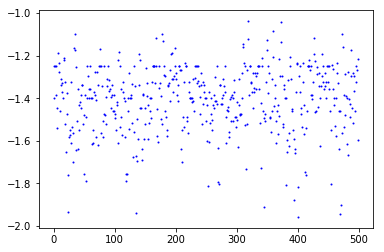

In [82]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import time

time_start = time.time()

N = 10
beta = 8
sn = StringNet(N)
num_leg = np.random.poisson(beta*N)
print(num_leg)
v_rand = [np.random.rand()*N for i in range(N)]
v_pipe = [int(v_rand[i]) for i in range(N)]
v_y = [v_rand[i]-int(v_rand[i]) for i in range(N)]
# print(v_rand)
# print(v_pipe)
# print(v_y)

for k in range(len(v_y)):
    res = sn.fn_insert_leg(v_pipe[k],v_y[k])
    if res==-1:
        print('dangerous')

print(sn.circle_number)

num_ite = 500
num_tot_step = num_ite*N
v_energy = np.zeros(num_ite)
# v_store = []
time_store = 0
time_delete = 0
time_add = 0
time_energy = 0
time_plot = 0
v_plot_circle = []
for i_ite in range(num_ite):
    if i_ite%100 == 0:
        print('===========================')
        print(i_ite)
        time_here = time.time()
        print(time_here-time_start)
        
    v_energy_local = np.zeros(N)
    for k in range(N):
        
        k_random = k
        
        leg_num = len(sn.pipe[k_random])
        leg_num = np.max([leg_num,2])
        
        v_energy_local_local = np.zeros(leg_num)
        for tind in range(leg_num):
            
            circle0 = sn.circle_number
            region1 = tind/leg_num
            region2 = (tind+1)/leg_num
            m_delete = sn.pipe[k_random]
            v_delete = [m_delete[i][0] for i in range(len(m_delete)) if m_delete[i][1]>region1 and m_delete[i][1]<=region2]
            v_delete_store = []
            # sn00 = copy.deepcopy(sn)
            for a in v_delete:
                # v_store.append(copy.deepcopy(sn))
                time1 = time.time()
                v_delete_store.append(sn.fn_delete_leg(a))
                time2 = time.time()
                time_delete = time_delete + time2 - time1
               
            num_add = np.random.poisson(beta/leg_num)
            v_add = np.random.rand(num_add)/leg_num + region1
            v_add_store = []
            for k2 in range(len(v_add)):
                y = v_add[k2]
                # v_store.append(copy.deepcopy(sn))
                time1 = time.time()
                while True:
                    res = sn.fn_insert_leg(k_random,y)
                    if res!=-1:
                        v_add_store.append(res)
                        break
                    else:
                        print('dangerous')
                time2 = time.time()
                time_add = time_add + time2 - time1
                
            circle1 = sn.circle_number
            
            if np.random.rand()<1.0/(2.0**(circle0-circle1)+1.0):
                # print('Jump')
                #print('Jump ============')
                #print(circle1)
                #print(sn.circle_number)
                time1 = time.time()
                res_crmap = sn.fn_crmap2(1)
                v_energy_local_local[tind] = -3/2*sum(res_crmap) + 1/2*N
                #v_energy_local_local[tind] = np.sum(-3/2*res_crmap+1/2)
                time2 = time.time()
                time_energy = time_energy + time2 - time1
            else:
                # print('not jump')
                time1 = time.time()
                for leg_ind in v_add_store:
                    sn.fn_delete_leg(leg_ind)
                time2 = time.time()
                time_delete = time_delete + time2 - time1
                
                time1 = time.time()
                for pipe_y in v_delete_store:
                    sn.fn_insert_leg(pipe_y[0],pipe_y[1])
                time2 = time.time()
                time_add = time_add + time2 - time1
                
                time1 = time.time()
                res_crmap = sn.fn_crmap2(1)
                v_energy_local_local[tind] = -3/2*sum(res_crmap) + 1/2*N
                #v_energy_local_local[tind] = np.sum(-3/2*res_crmap+1/2)
                time2 = time.time()
                time_energy = time_energy + time2 - time1
                     
        v_energy_local[k] = np.mean(v_energy_local_local)          
    v_plot_circle.append(sn.circle_number)
    v_energy[i_ite] = np.mean(v_energy_local)/N-1     

time_end = time.time()           
print('time_store=%f' %(time_store)) 
print('time_plot=%f' %(time_plot)) 
print('time_delete=%f' %(time_delete))
print('time_add=%f' %(time_add))
print('time_energy=%f' %(time_energy))
print('time_all=%f' %(time_end - time_start))
# plt.scatter([x for x in range(len(v_plot_circle))],v_plot_circle,c='b',s=1)
plt.scatter(np.arange(len(v_energy)),v_energy,c='b',s=1)
plt.show()



In [56]:
print('haha')

haha
